In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

In [2]:
cholera_data = pd.read_csv('data.csv')
cholera_data.head()

,Country,Year,Number of reported cases of cholera,Number of reported deaths from cholera,Cholera case fatality rate,WHO Region
0,Afghanistan,2016,677,5,0.7,Eastern Mediterranean
1,Afghanistan,2015,58064,8,0.01,Eastern Mediterranean
2,Afghanistan,2014,45481,4,0.0,Eastern Mediterranean
3,Afghanistan,2013,3957,14,0.35,Eastern Mediterranean
4,Afghanistan,2012,12,0,0.1,Eastern Mediterranean


In [3]:
cholera_data.isnull().sum()

Country                                     0
Year                                        0
Number of reported cases of cholera        22
Number of reported deaths from cholera    117
Cholera case fatality rate                127
WHO Region                                  0
dtype: int64

<Axes: >

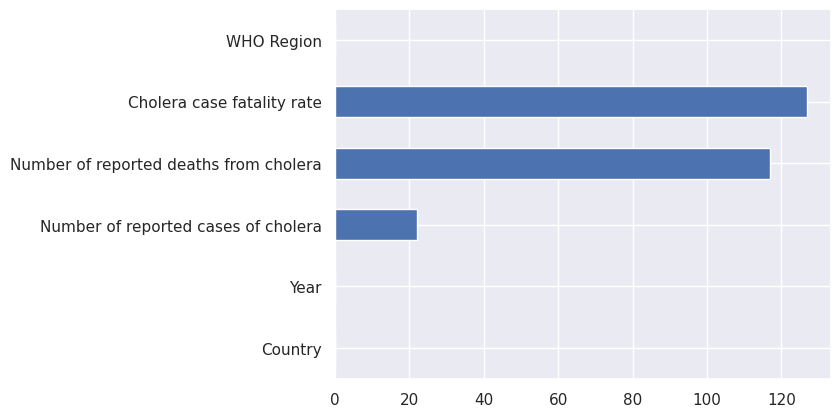

In [4]:
cholera_data.isnull().sum().plot(kind='barh')

In [5]:
cholera_data['Number of reported cases of cholera'] = pd.to_numeric(cholera_data['Number of reported cases of cholera'], errors='coerce')
cholera_data['Number of reported deaths from cholera'] = pd.to_numeric(cholera_data['Number of reported deaths from cholera'], errors='coerce')
cholera_data['Cholera case fatality rate'] = pd.to_numeric(cholera_data['Cholera case fatality rate'], errors='coerce')
# Forward fill and backward fill null values
cholera_data['Number of reported cases of cholera'].fillna(method='ffill', inplace=True)
cholera_data['Number of reported cases of cholera'].fillna(method='bfill', inplace=True)

# Calculate the mean of the next and past elements
mean_values = (cholera_data['Number of reported cases of cholera'].shift(1) + cholera_data['Number of reported cases of cholera'].shift(-1)) / 2

# Replace null values with the calculated mean values and convert back to integer
cholera_data['Number of reported cases of cholera'] = cholera_data['Number of reported cases of cholera'].fillna(mean_values).astype(int)

In [6]:
cholera_data.isnull().sum()

Country                                     0
Year                                        0
Number of reported cases of cholera         0
Number of reported deaths from cholera    119
Cholera case fatality rate                129
WHO Region                                  0
dtype: int64

In [7]:
cholera_data.dropna()

,Country,Year,Number of reported cases of cholera,Number of reported deaths from cholera,Cholera case fatality rate,WHO Region
0,Afghanistan,2016,677,5.0,0.70,Eastern Mediterranean
1,Afghanistan,2015,58064,8.0,0.01,Eastern Mediterranean
2,Afghanistan,2014,45481,4.0,0.00,Eastern Mediterranean
3,Afghanistan,2013,3957,14.0,0.35,Eastern Mediterranean
4,Afghanistan,2012,12,0.0,0.10,Eastern Mediterranean
...,...,...,...,...,...,...
2463,Zimbabwe,1992,2048,105.0,5.13,Africa
2465,Zimbabwe,1985,144,6.0,4.17,Africa
2466,Zimbabwe,1976,144,9.0,6.25,Africa
2467,Zimbabwe,1975,615,33.0,5.37,Africa


In [8]:
cholera_data.duplicated().sum()

0

In [9]:
# Drop rows with non-finite values in 'Number of reported deaths from cholera' column
cholera_data = cholera_data.dropna(subset=['Number of reported deaths from cholera'])
cholera_data['Number of reported deaths from cholera'] = cholera_data['Number of reported deaths from cholera'].astype(int)
cholera_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2373 entries, 0 to 2490
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 2373 non-null   object 
 1   Year                                    2373 non-null   int64  
 2   Number of reported cases of cholera     2373 non-null   int64  
 3   Number of reported deaths from cholera  2373 non-null   int64  
 4   Cholera case fatality rate              2352 non-null   float64
 5   WHO Region                              2373 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 129.8+ KB


In [10]:
cholera_data.head()

,Country,Year,Number of reported cases of cholera,Number of reported deaths from cholera,Cholera case fatality rate,WHO Region
0,Afghanistan,2016,677,5,0.70,Eastern Mediterranean
1,Afghanistan,2015,58064,8,0.01,Eastern Mediterranean
2,Afghanistan,2014,45481,4,0.00,Eastern Mediterranean
3,Afghanistan,2013,3957,14,0.35,Eastern Mediterranean
4,Afghanistan,2012,12,0,0.10,Eastern Mediterranean


In [11]:
cholera_data.groupby(['WHO Region', 'Country', 'Year'])[['Number of reported cases of cholera', 'Number of reported deaths from cholera', 'Cholera case fatality rate']].sum().head(5)

Number of reported cases of cholera  \
WHO Region Country Year                                        
Africa     Algeria 1971                                 1332   
                   1972                                  646   
                   1973                                  605   
                   1974                                  738   
                   1975                                 1165   

                         Number of reported deaths from cholera  \
WHO Region Country Year                                           
Africa     Algeria 1971                                     110   
                   1972                                      71   
                   1973                                      74   
                   1974                                      50   
                   1975                                     118   

                         Cholera case fatality rate  
WHO Region Country Year                              
Africa     Algeria 1971                        8.26  
                   1972                       10.99  
                   1973                       12.23  
                   1974                        6.78  
                   1975                       10.13

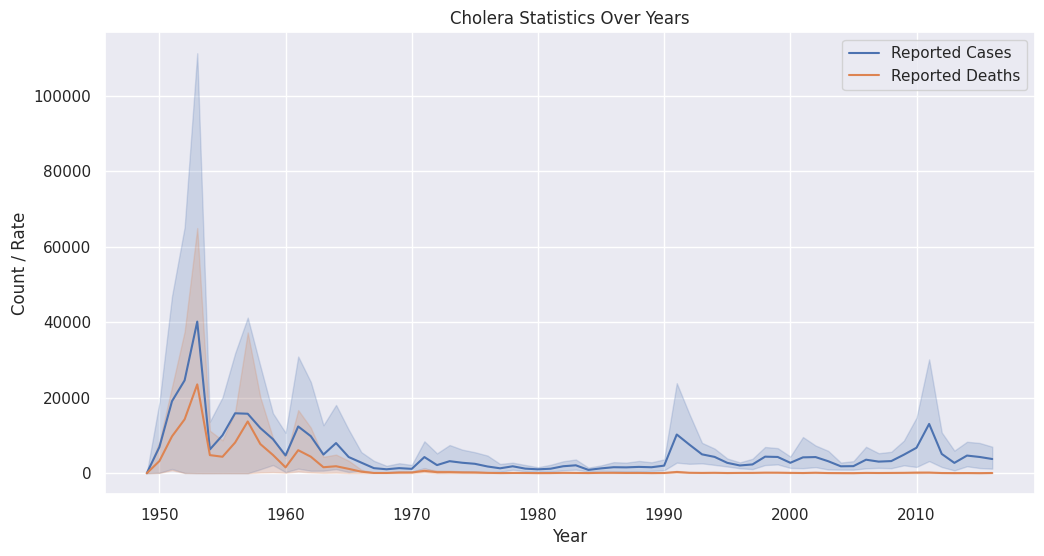

In [12]:
# Convert columns to numeric if not already
numeric_columns = ["Number of reported cases of cholera", "Number of reported deaths from cholera", "Cholera case fatality rate"]
cholera_data[numeric_columns] =cholera_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Create a line chart using Seaborn
plt.figure(figsize=(12, 6))

sns.lineplot(x='Year', y='Number of reported cases of cholera', data=cholera_data, label='Reported Cases')
sns.lineplot(x='Year', y='Number of reported deaths from cholera', data=cholera_data, label='Reported Deaths')


plt.title('Cholera Statistics Over Years')
plt.xlabel('Year')
plt.ylabel('Count / Rate')
plt.legend()
plt.show()

In [14]:
cholera_data.to_csv('analyzed_data.csv', index=False)